In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score
import pandas as pd
import json
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

with open(r'D:\dtc-dr\models\feature-selection\combined_results_23012024.json', 'r') as json_file:
    # Load the JSON data
    json_data = json.load(json_file)
df = pd.read_csv(
    r"D:\dtc-dr\data-analyse\continuous_factory_process.csv", delimiter=","
)

prefixes_to_match = ["Machine1", "Machine2", "Machine3"]

# Use list comprehension to filter columns based on prefixes
filtered_columns = [
    col
    for col in df.columns
    if any(col.startswith(prefix) for prefix in prefixes_to_match)
]

result = {}

for key, value in json_data.items():
    
    filtered_df = df[filtered_columns]

    indices = value["mlp"][2]
    X = filtered_df.iloc[:, indices]

    y = df[key]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Create a linear regression model
    linear_reg_model = MLPRegressor()

   # Define the cross-validation strategy (5-fold cross-validation) on the training set
    cv_train = KFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation on the training set
    r2_scores_train = cross_val_score(linear_reg_model, X_train, y_train, cv=cv_train, scoring='r2')
    mse_scores_train = -cross_val_score(linear_reg_model, X_train, y_train, cv=cv_train, scoring='neg_mean_squared_error')
    print(key)
    # Print the cross-validation results on the training set
    print(f'Training set - R-squared scores: {r2_scores_train}')
    print(f'Training set - Mean R-squared: {np.mean(r2_scores_train)}')
    print(f'Training set - Mean Squared Error scores: {mse_scores_train}')
    print(f'Training set - Mean MSE: {np.mean(mse_scores_train)}')

    # Define the cross-validation strategy (5-fold cross-validation) on the test set
    cv_test = KFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation on the test set
    r2_scores_test = cross_val_score(linear_reg_model, X_test, y_test, cv=cv_test, scoring='r2')
    mse_scores_test = -cross_val_score(linear_reg_model, X_test, y_test, cv=cv_test, scoring='neg_mean_squared_error')

    # Print the cross-validation results on the test set
    print(f'Test set - R-squared scores: {r2_scores_test}')
    print(f'Test set - Mean R-squared: {np.mean(r2_scores_test)}')
    print(f'Test set - Mean Squared Error scores: {mse_scores_test}')
    print(f'Test set - Mean MSE: {np.mean(mse_scores_test)}')
    print('\n')

    result[key] = {
        "r2_scores_train": np.mean(r2_scores_train),
        "mse_scores_train": np.mean(mse_scores_train),
        "r2_scores_test": np.mean(r2_scores_test),
        "mse_scores_test": np.mean(mse_scores_test),
        "indices": value["regression"][2],
    }

with open("cv_scores_mlp.json", 'w') as json_file:
    json.dump(result, json_file, indent=2)  # 'indent' parameter is optional for better readability


Stage1.Output.Measurement0.U.Actual
Training set - R-squared scores: [ 0.00915226  0.00640315  0.0179389  -0.00127778 -0.00373481]
Training set - Mean R-squared: 0.005696344558059607
Training set - Mean Squared Error scores: [0.86635629 0.88886752 0.99188973 1.00536065 0.91080722]
Training set - Mean MSE: 0.9326562807726617
Test set - R-squared scores: [-0.03024197 -0.03602623 -0.02286066 -0.025854   -0.04964637]
Test set - Mean R-squared: -0.032925844823605964
Test set - Mean Squared Error scores: [0.619675   0.91754354 0.38967416 0.49201563 0.65291001]
Test set - Mean MSE: 0.614363666488889


Stage1.Output.Measurement1.U.Actual
Training set - R-squared scores: [0.62438565 0.69796158 0.69555419 0.02172349 0.53250285]
Training set - Mean R-squared: 0.5144255511813596
Training set - Mean Squared Error scores: [20.98372657 16.74874221 18.94922312 24.35532135 26.93707936]
Training set - Mean MSE: 21.59481852205826


d:\dtc-dr\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\dtc-dr\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Test set - R-squared scores: [0.41121492 0.34668214 0.28981105 0.33509092 0.33606824]
Test set - Mean R-squared: 0.3437734527433124
Test set - Mean Squared Error scores: [28.51438058 33.92834117 25.40507459 35.71493429 37.50891826]
Test set - Mean MSE: 32.21432977761206


Stage1.Output.Measurement2.U.Actual
Training set - R-squared scores: [-0.14503076  0.04301283  0.03630015  0.04089586  0.053287  ]
Training set - Mean R-squared: 0.005693017272304424
Training set - Mean Squared Error scores: [1.57631522 1.02978602 1.15180822 1.15646    1.40153932]
Training set - Mean MSE: 1.2631817549994413
Test set - R-squared scores: [ 0.07032487  0.04621371  0.06377279 -0.2546867   0.00711799]
Test set - Mean R-squared: -0.013451467410167983
Test set - Mean Squared Error scores: [0.70053572 0.95716118 0.78578477 1.10340456 1.43134756]
Test set - Mean MSE: 0.9956467583195618


Stage1.Output.Measurement3.U.Actual
Training set - R-squared scores: [ 0.01770409  0.00841554 -0.0176035   0.00329933  0.010

d:\dtc-dr\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Test set - R-squared scores: [-0.6555853  -0.00149791 -0.51429775 -0.04944887 -0.04378869]
Test set - Mean R-squared: -0.2529237024121221
Test set - Mean Squared Error scores: [0.42173819 0.38619669 0.2669787  0.37210577 0.34106296]
Test set - Mean MSE: 0.35761646268270675


Stage1.Output.Measurement6.U.Actual
Training set - R-squared scores: [ 0.35529202  0.16064534  0.25739939 -0.16445486  0.31413599]
Training set - Mean R-squared: 0.18460357496149257
Training set - Mean Squared Error scores: [1.3259266  2.35147276 1.56006175 3.98763758 1.20054434]
Training set - Mean MSE: 2.085128608205875


d:\dtc-dr\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Test set - R-squared scores: [0.22337681 0.16950057 0.22376934 0.16179128 0.1042886 ]
Test set - Mean R-squared: 0.1765453200130987
Test set - Mean Squared Error scores: [1.21074322 0.87411666 1.06809404 2.85315584 1.15719016]
Test set - Mean MSE: 1.4326599836739429


Stage1.Output.Measurement7.U.Actual
Training set - R-squared scores: [ 0.53519868  0.63050234  0.70879862  0.63333317 -0.25294852]
Training set - Mean R-squared: 0.450976856795177
Training set - Mean Squared Error scores: [2.24030477 0.70720525 0.74844093 0.58240745 0.74983108]
Training set - Mean MSE: 1.0056378984955399
Test set - R-squared scores: [0.71549588 0.71078805 0.72322723 0.49376524 0.63176101]
Test set - Mean R-squared: 0.6550074815045873
Test set - Mean Squared Error scores: [0.59808468 0.64626417 0.98317158 1.03360274 0.72852638]
Test set - Mean MSE: 0.7979299117093004


Stage1.Output.Measurement8.U.Actual
Training set - R-squared scores: [ 0.11967981 -0.09085004  0.12535637 -0.28465021  0.12881139]
Training

d:\dtc-dr\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Test set - R-squared scores: [ 0.22537793  0.24586001  0.08477418  0.00764132 -0.28502125]
Test set - Mean R-squared: 0.05572643718782237
Test set - Mean Squared Error scores: [29.19096836 24.28503068 20.61580091 27.6784377  23.99801651]
Test set - Mean MSE: 25.153650833129067


Stage1.Output.Measurement9.U.Actual
Training set - R-squared scores: [-1.22697337  0.19816202 -2.71394524  0.18584192 -0.09592509]
Training set - Mean R-squared: -0.7305679533924965
Training set - Mean Squared Error scores: [17.35521964 22.57065801 16.35485823 18.54871012 14.44196215]
Training set - Mean MSE: 17.854281628417617
Test set - R-squared scores: [ 0.09070413  0.24280758  0.18058147 -0.0521486   0.09087507]
Test set - Mean R-squared: 0.11056392927765835
Test set - Mean Squared Error scores: [17.56429403 18.75623651 16.34415632 21.84258155 17.6303444 ]
Test set - Mean MSE: 18.427522561900588


Stage1.Output.Measurement10.U.Actual
Training set - R-squared scores: [-0.42867762 -0.0430104  -0.04131659 -0.

d:\dtc-dr\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Test set - R-squared scores: [0.30780294 0.70955552 0.85647782 0.87204735 0.77062856]
Test set - Mean R-squared: 0.7033024360249238
Test set - Mean Squared Error scores: [1.29901708 1.85386588 1.13002204 0.73353783 0.80001788]
Test set - Mean MSE: 1.1632921413383952


Stage1.Output.Measurement12.U.Actual
Training set - R-squared scores: [ 0.36138713  0.02682948  0.25601774 -0.58048754  0.41026179]
Training set - Mean R-squared: 0.09480172161880543
Training set - Mean Squared Error scores: [0.26920734 0.35184191 0.2925649  0.53851454 0.27324629]
Training set - Mean MSE: 0.3450749971732523
Test set - R-squared scores: [ 0.11344774  0.38578332  0.36598626 -0.06020393  0.41271085]
Test set - Mean R-squared: 0.2435448467795937
Test set - Mean Squared Error scores: [0.36878591 0.24402484 0.37113609 0.32845357 0.30471501]
Test set - Mean MSE: 0.32342308315873647


Stage1.Output.Measurement13.U.Actual
Training set - R-squared scores: [0.14737674 0.1550251  0.19046523 0.21023717 0.19239239]
Tra

d:\dtc-dr\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


FirstStage.CombinerOperation.Temperature1.U.Actual
Training set - R-squared scores: [0.77641987 0.7187963  0.68881232 0.82268521 0.7114845 ]
Training set - Mean R-squared: 0.7436396397876859
Training set - Mean Squared Error scores: [10.09342161  5.39948149  7.8752025   5.84265113  7.65433677]
Training set - Mean MSE: 7.373018701769736


d:\dtc-dr\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\dtc-dr\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\dtc-dr\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\dtc-dr\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\dtc-dr\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic

Test set - R-squared scores: [0.70900844 0.72538256 0.68817952 0.53424186 0.71007445]
Test set - Mean R-squared: 0.6733773662697484
Test set - Mean Squared Error scores: [10.20100582 10.85177555  9.03228166 19.38790851  9.66602875]
Test set - Mean MSE: 11.827800058279056




d:\dtc-dr\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\dtc-dr\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\dtc-dr\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\dtc-dr\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\dtc-dr\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic

FirstStage.CombinerOperation.Temperature2.U.Actual
Training set - R-squared scores: [0.81309947 0.83814595 0.82179718 0.67999974 0.67494666]
Training set - Mean R-squared: 0.7655977996032558
Training set - Mean Squared Error scores: [48.15147476 63.65893111 68.46206212 68.39470782 81.39953757]
Training set - Mean MSE: 66.01334267462705


d:\dtc-dr\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\dtc-dr\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\dtc-dr\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\dtc-dr\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\dtc-dr\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic

Test set - R-squared scores: [0.72425261 0.60128133 0.66781493 0.64972078 0.62778717]
Test set - Mean R-squared: 0.654171364704324
Test set - Mean Squared Error scores: [ 90.93822956 135.06103785 114.0239436  121.53716512 120.07876333]
Test set - Mean MSE: 116.32782789074481


FirstStage.CombinerOperation.Temperature3.C.Actual
Training set - R-squared scores: [-0.08828909 -0.07128083 -0.22423469 -0.08011417 -3.50161131]
Training set - Mean R-squared: -0.7931060181967257
Training set - Mean Squared Error scores: [0.01656509 0.01373149 0.01495701 0.01603392 0.02196844]
Training set - Mean MSE: 0.016651189047093867
Test set - R-squared scores: [-0.18808642 -0.13044856 -0.10862121 -0.66436705 -0.24922603]
Test set - Mean R-squared: -0.26814985389017953
Test set - Mean Squared Error scores: [0.01584784 0.01557619 0.01430945 0.01525101 0.01517569]
Test set - Mean MSE: 0.015232036656167649




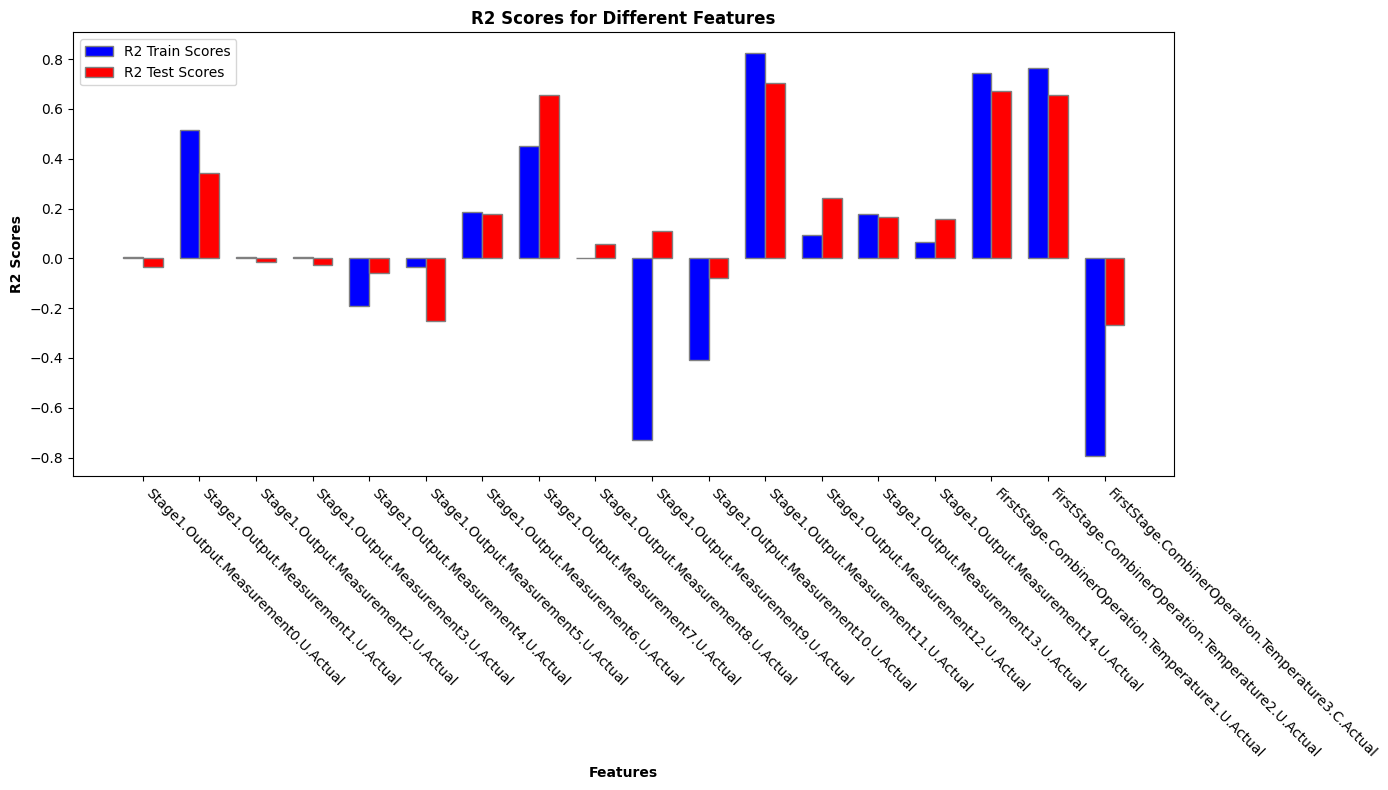

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'features' is a list of feature names
features = [key for key, value in result.items()]
r2_train_scores = [value["r2_scores_train"] for key, value in result.items()]
r2_test_scores = [value["r2_scores_test"] for key, value in result.items()]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on X-axis
r1 = np.arange(len(features))
r2 = [x + bar_width for x in r1]

# Increase the height of the chart by adjusting figsize
plt.figure(figsize=(14, 8))  # Adjust the height and width

# Plotting the bar chart
plt.bar(r1, r2_train_scores, color='b', width=bar_width, edgecolor='grey', label='R2 Train Scores')
plt.bar(r2, r2_test_scores, color='r', width=bar_width, edgecolor='grey', label='R2 Test Scores')

# Adding labels and title
plt.xlabel('Features', fontweight='bold')
plt.ylabel('R2 Scores', fontweight='bold')
plt.title('R2 Scores for Different Features', fontweight='bold')

# Rotating x-axis labels counterclockwise
plt.xticks([r + bar_width/2 for r in range(len(features))], features, rotation=-45, ha='left', fontsize=10)

# Adding legend
plt.legend()

# Adjusting layout to prevent label overlapping
plt.tight_layout()

# Display the plot
plt.show()
